<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220530_fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion mnist classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


##데이터 불러오기

- 10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


- train_images, train_labels: 모델 학습에 사용되는 훈련 세트
- train_images, test_labels: 모델 테스트에 사용되는 테스트 세트

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##데이터 탐색

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

##데이터 전처리

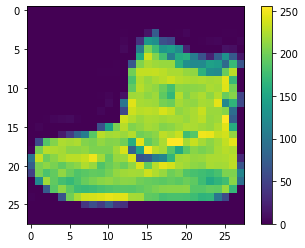

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

- 신경망 모델에 주입하기 전에 값의 범위를 0~1 사이로 조정
- 훈련 세트와 테스트 세트를 동일한 방식으로 전처리

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

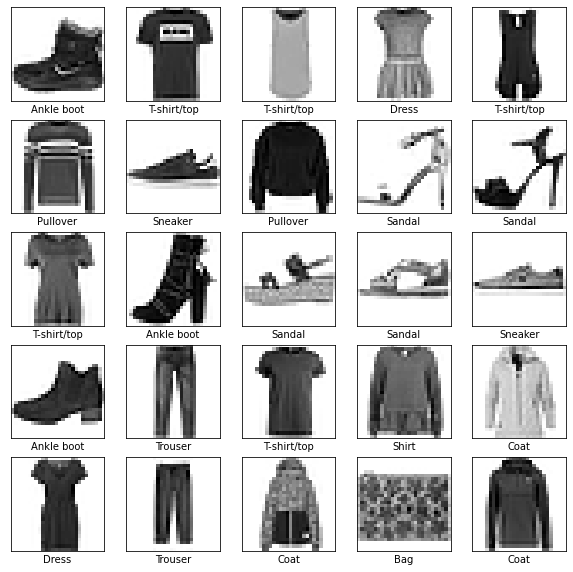

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##모델 구성

###층 설정
- 레이어: 신경망의 기본 빌딩 블록. 레이어에 공급된 데이터로부터 표현 추출

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

- `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환
- 이 층은 학습되는 가중치가 없고 이미지에 있는 픽셀의 행을 펼쳐 데이터를 변환

##모델 컴파일

- 손실 함수: 훈련 중 모델이 얼마나 정확한지 측정. 함수값을 최소화하는 게 목적
- 옵티마이저: 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식
- 메트릭스: 훈련 및 테스트 단계를 모니터링. 여기서는 올바르게 분류된 이미지 비율인 정확도를 사용

In [14]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

##모델 훈련

1. 훈련 데이터를 모델에 주입
2. 모델이 이미지와 레이블을 매핑
3. 테스트 세트에 대한 모델의 예측
4. 예측이 실제 값과 일치하는지 확인

###모델 피드

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5025 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3786 - accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3413 - accuracy: 0.8753
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3162 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2971 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2821 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2718 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2593 - accuracy: 0.9025
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2504 - accuracy: 0.9059
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.242

- 약 0.90의 정확도

##정확도 평가

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3321 - accuracy: 0.8865 - 564ms/epoch - 2ms/step

Test accuracy: 0.8865000009536743


- 테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮음
- 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문

##예측

In [19]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

In [21]:
#첫 번째 예측 확인
predictions[0]

array([1.8173340e-08, 5.1725280e-10, 1.0109664e-08, 1.7109458e-09,
       2.0597177e-08, 1.4611885e-04, 1.4600343e-07, 2.9563345e-02,
       2.5881934e-07, 9.7029006e-01], dtype=float32)

- 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도

In [22]:
np.argmax(predictions[0])   #가장 높은 신뢰도를 가진 레이블

9

In [23]:
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

##예측 확인

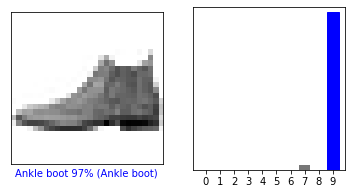

In [26]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

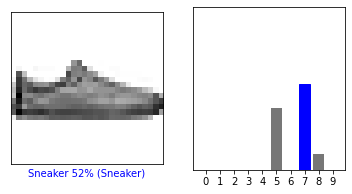

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

- 올바르게 예측된 레이블은 파란색, 잘못 예측된 레이블은 빨간색 
- 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점) 신뢰도 점수가 높을 때도 잘못 예측할 수 있음

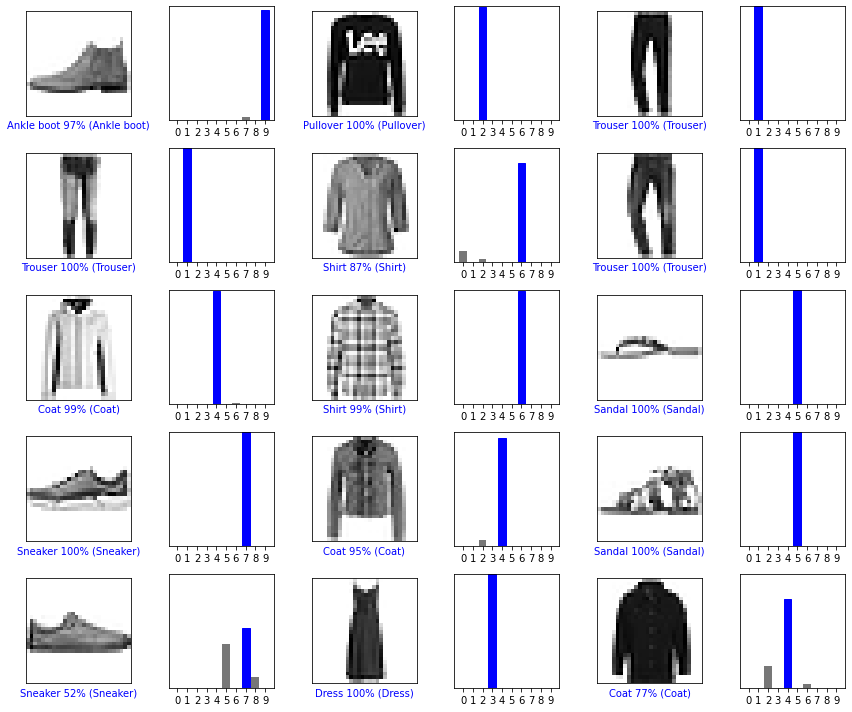

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

##훈련된 모델 사용

In [29]:
#Grab an image from the test dataset
img = test_images[1]
print(img.shape)

(28, 28)


- `tf.keras` 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화
- 하나의 이미지를 사용할 때에도 2차원 배열 입력

In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.2250355e-05 1.7152416e-13 9.9776924e-01 1.5267707e-08 1.9120736e-03
  1.5544440e-16 2.9645389e-04 5.0048981e-18 8.1641360e-11 3.5393279e-12]]


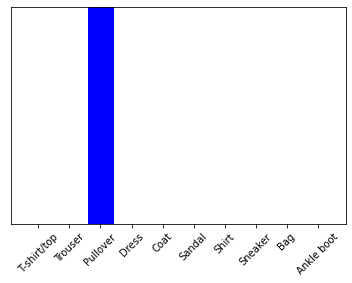

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

- `tf.keras.Model.predict`: 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환
- 배치에서 (유일한) 이미지에 대한 예측 반환

In [33]:
np.argmax(predictions_single[0])

2